In [1]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

start=0
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

data = pd.read_csv("../OtherData/32973_0000000000.csv")
data = np.array(data)
length=[]
for i in range(len(data)):
    length.append(i)
# print(len(length))
Spectrum=[]
Spectrum_index=list(range(0, 100))
index=0

[ 1.1875    -0.j         -0.01683146-0.05245305j -0.0064641 +0.00693028j
 -0.0616559 -0.05510144j -0.06281362-0.0456151j   0.06205006-0.00084772j
  0.0710101 -0.00884587j -0.05147675+0.04051257j -0.01507553+0.02820988j
 -0.04007853+0.07468756j  0.03976695-0.01486026j -0.07708301-0.11124366j
  0.01029985+0.01711921j -0.09396774+0.03074719j  0.06298954-0.09624595j
  0.01008315+0.03668529j -0.02927422+0.14548166j  0.0383018 +0.0122843j
 -0.00810011+0.00361864j -0.00322071+0.02969011j -0.06917267+0.05727295j
  0.02811991-0.02967027j  0.02569829-0.00283824j  0.05689524-0.00898964j
  0.00850063-0.03729947j  0.078125  +0.015625j    0.00249034-0.02431566j
 -0.04973644+0.04129188j -0.02536144+0.02770658j  0.01614707+0.05796884j
 -0.04757945+0.00918414j -0.04600513+0.01987018j -0.01735763-0.00353628j
 -0.06765884-0.03267465j -0.01048721+0.04273176j -0.04502171-0.01140351j
 -0.02821752-0.05477508j  0.00982805-0.07187397j  0.02305118-0.02410899j
 -0.05367819-0.12254329j -0.01676483-0.02621249j -0.

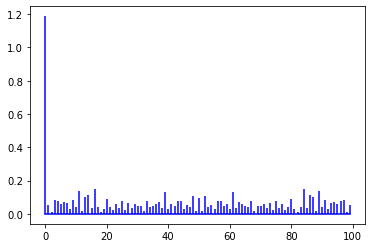

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


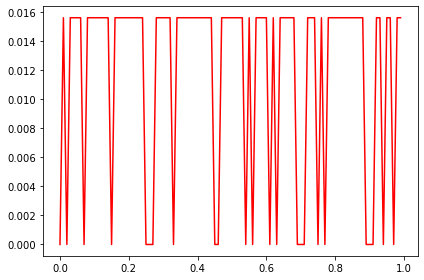

[ 1.15625000e+00-0.j         -7.83423572e-02+0.09623658j
  3.84339941e-02+0.01689476j  6.01635611e-02+0.0040453j
 -7.44434707e-03-0.04142791j -1.51010784e-02+0.00330791j
  2.45912618e-02-0.02701511j  2.70252468e-02-0.01958897j
  1.46422846e-02-0.02882757j -9.82602662e-02-0.0387925j
  1.37807189e-02+0.0905015j  -2.06909891e-02+0.05896253j
 -8.02441234e-03-0.01002631j -3.61557324e-02+0.02614875j
  3.53171290e-02-0.0132557j  -7.49830512e-02-0.11649673j
 -4.07703574e-02-0.03992475j -2.70791749e-02-0.02453114j
  6.21716666e-03-0.01569777j  4.67366719e-02+0.01314561j
 -1.15010621e-02+0.00567611j  6.59138118e-02+0.08368425j
 -1.87491760e-02+0.07501922j -5.43124029e-03+0.04762129j
  6.44834542e-02-0.03144826j  1.09375000e-01+0.046875j
  3.87305515e-02+0.04118237j -3.78995214e-02-0.04202929j
 -1.09584366e-01+0.01802037j  1.50073105e-02-0.02473338j
  4.87192811e-02+0.04674886j  7.84743921e-02-0.01149593j
 -1.22006171e-02-0.06305227j -1.76225131e-03+0.06976879j
  4.14462040e-02+0.08687287j  2.826

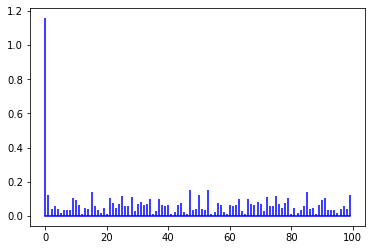

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


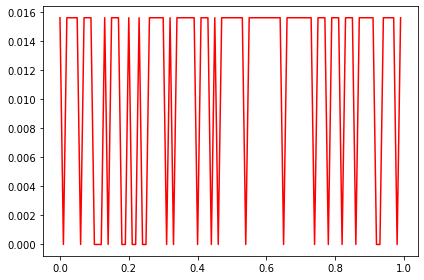

In [2]:
for i in range (0,2000,1000):
#     x=np.real(fft(data[start+(sr*i):start+((i+1)*sr),1]))
#     x=np.real(fft((data[start+i:start+i+sr,1])))
    x=(data[start+i:start+i+sr,1])
    X = fft(x)
    print(X)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
    Spectrum.append(np.abs(X))
#     plt.xlabel('Freq (Hz)', fontsize = 40, labelpad = 20)
#     plt.ylabel('FFT Amplitude |X(freq)|', fontsize = 40, labelpad = 20)
    plt.show()
#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.plot(t, ifft(X), 'r')
#     plt.xlabel('Time (s)', fontsize = 40, labelpad = 20)
#     plt.ylabel('Amplitude', fontsize = 40, labelpad = 20)
    plt.tight_layout()
    plt.show()

In [3]:
print(Spectrum)

[array([1.1875    , 0.05508739, 0.009477  , 0.0826899 , 0.07762917,
       0.06205585, 0.07155896, 0.06550668, 0.03198545, 0.08476155,
       0.04245277, 0.1353401 , 0.01997885, 0.09887025, 0.11502593,
       0.03804577, 0.14839775, 0.04022353, 0.00887166, 0.02986429,
       0.08980562, 0.04087853, 0.02585455, 0.05760106, 0.03825586,
       0.07967218, 0.02444286, 0.06464312, 0.03756138, 0.0601757 ,
       0.04845774, 0.05011283, 0.01771419, 0.07513555, 0.04399983,
       0.04644346, 0.06161605, 0.0725428 , 0.03335567, 0.13378418,
       0.03111517, 0.06137892, 0.05034873, 0.0751996 , 0.08025384,
       0.02907538, 0.05202415, 0.0408703 , 0.10970806, 0.01652533,
       0.09375   , 0.01652533, 0.10970806, 0.0408703 , 0.05202415,
       0.02907538, 0.08025384, 0.0751996 , 0.05034873, 0.06137892,
       0.03111517, 0.13378418, 0.03335567, 0.0725428 , 0.06161605,
       0.04644346, 0.04399983, 0.07513555, 0.01771419, 0.05011283,
       0.04845774, 0.0601757 , 0.03756138, 0.06464312, 0.0244

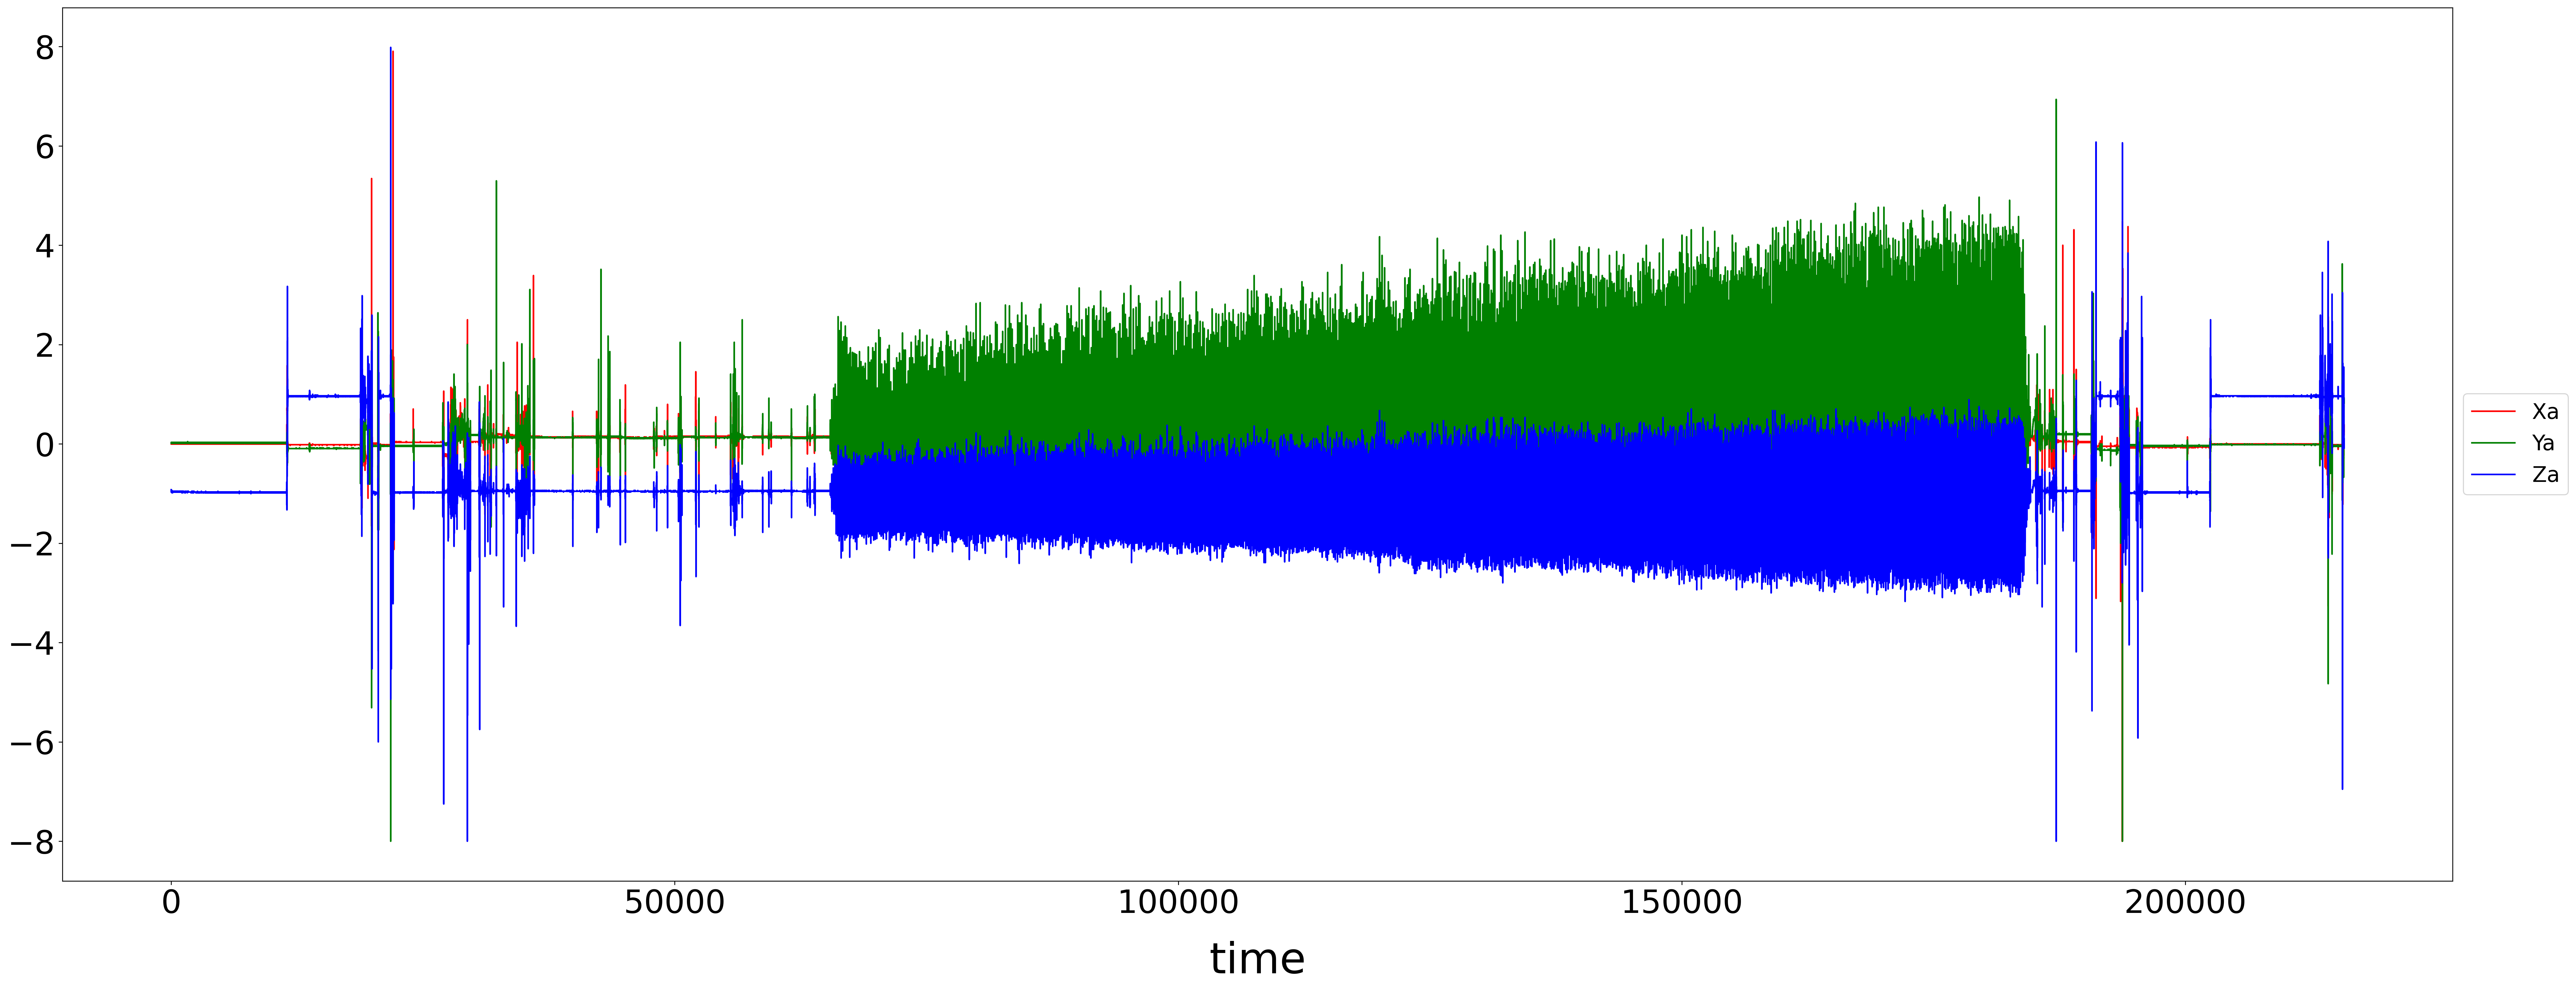

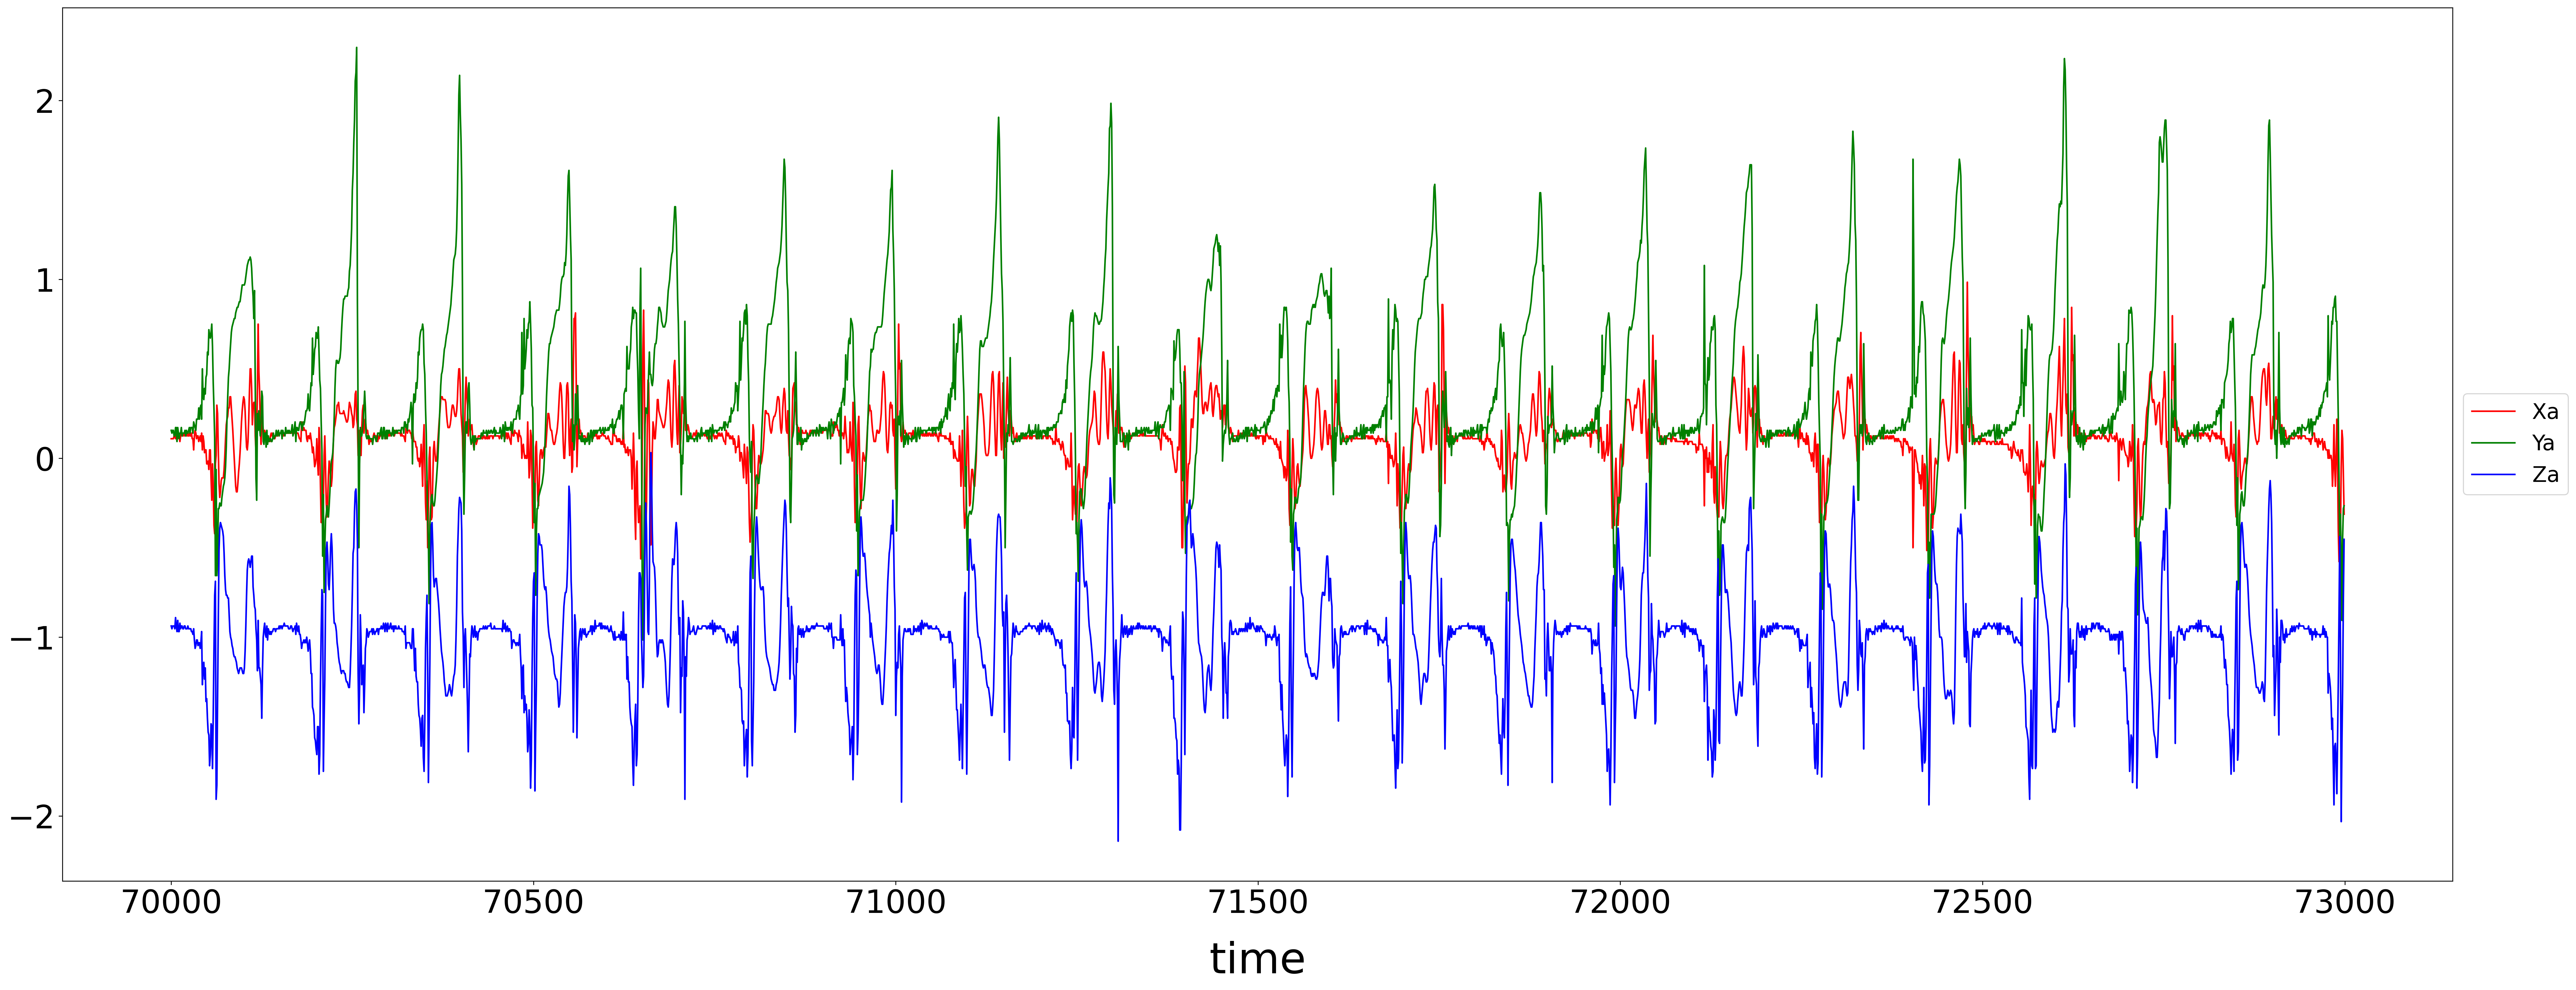

In [4]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, data[:,1], color = 'r', label = "Xa")
plt.plot(length, data[:,2], color = 'g', label = "Ya")
plt.plot(length, data[:,3], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
temp_length=[]
temp_start=70000
temp_d=3000
for i in range(0,temp_d):
    temp_length.append(i+temp_start)
plt.plot(temp_length, data[temp_start:temp_start+temp_d,1], color = 'r', label = "Xa")
plt.plot(temp_length, data[temp_start:temp_start+temp_d,2], color = 'g', label = "Ya")
plt.plot(temp_length, data[temp_start:temp_start+temp_d,3], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


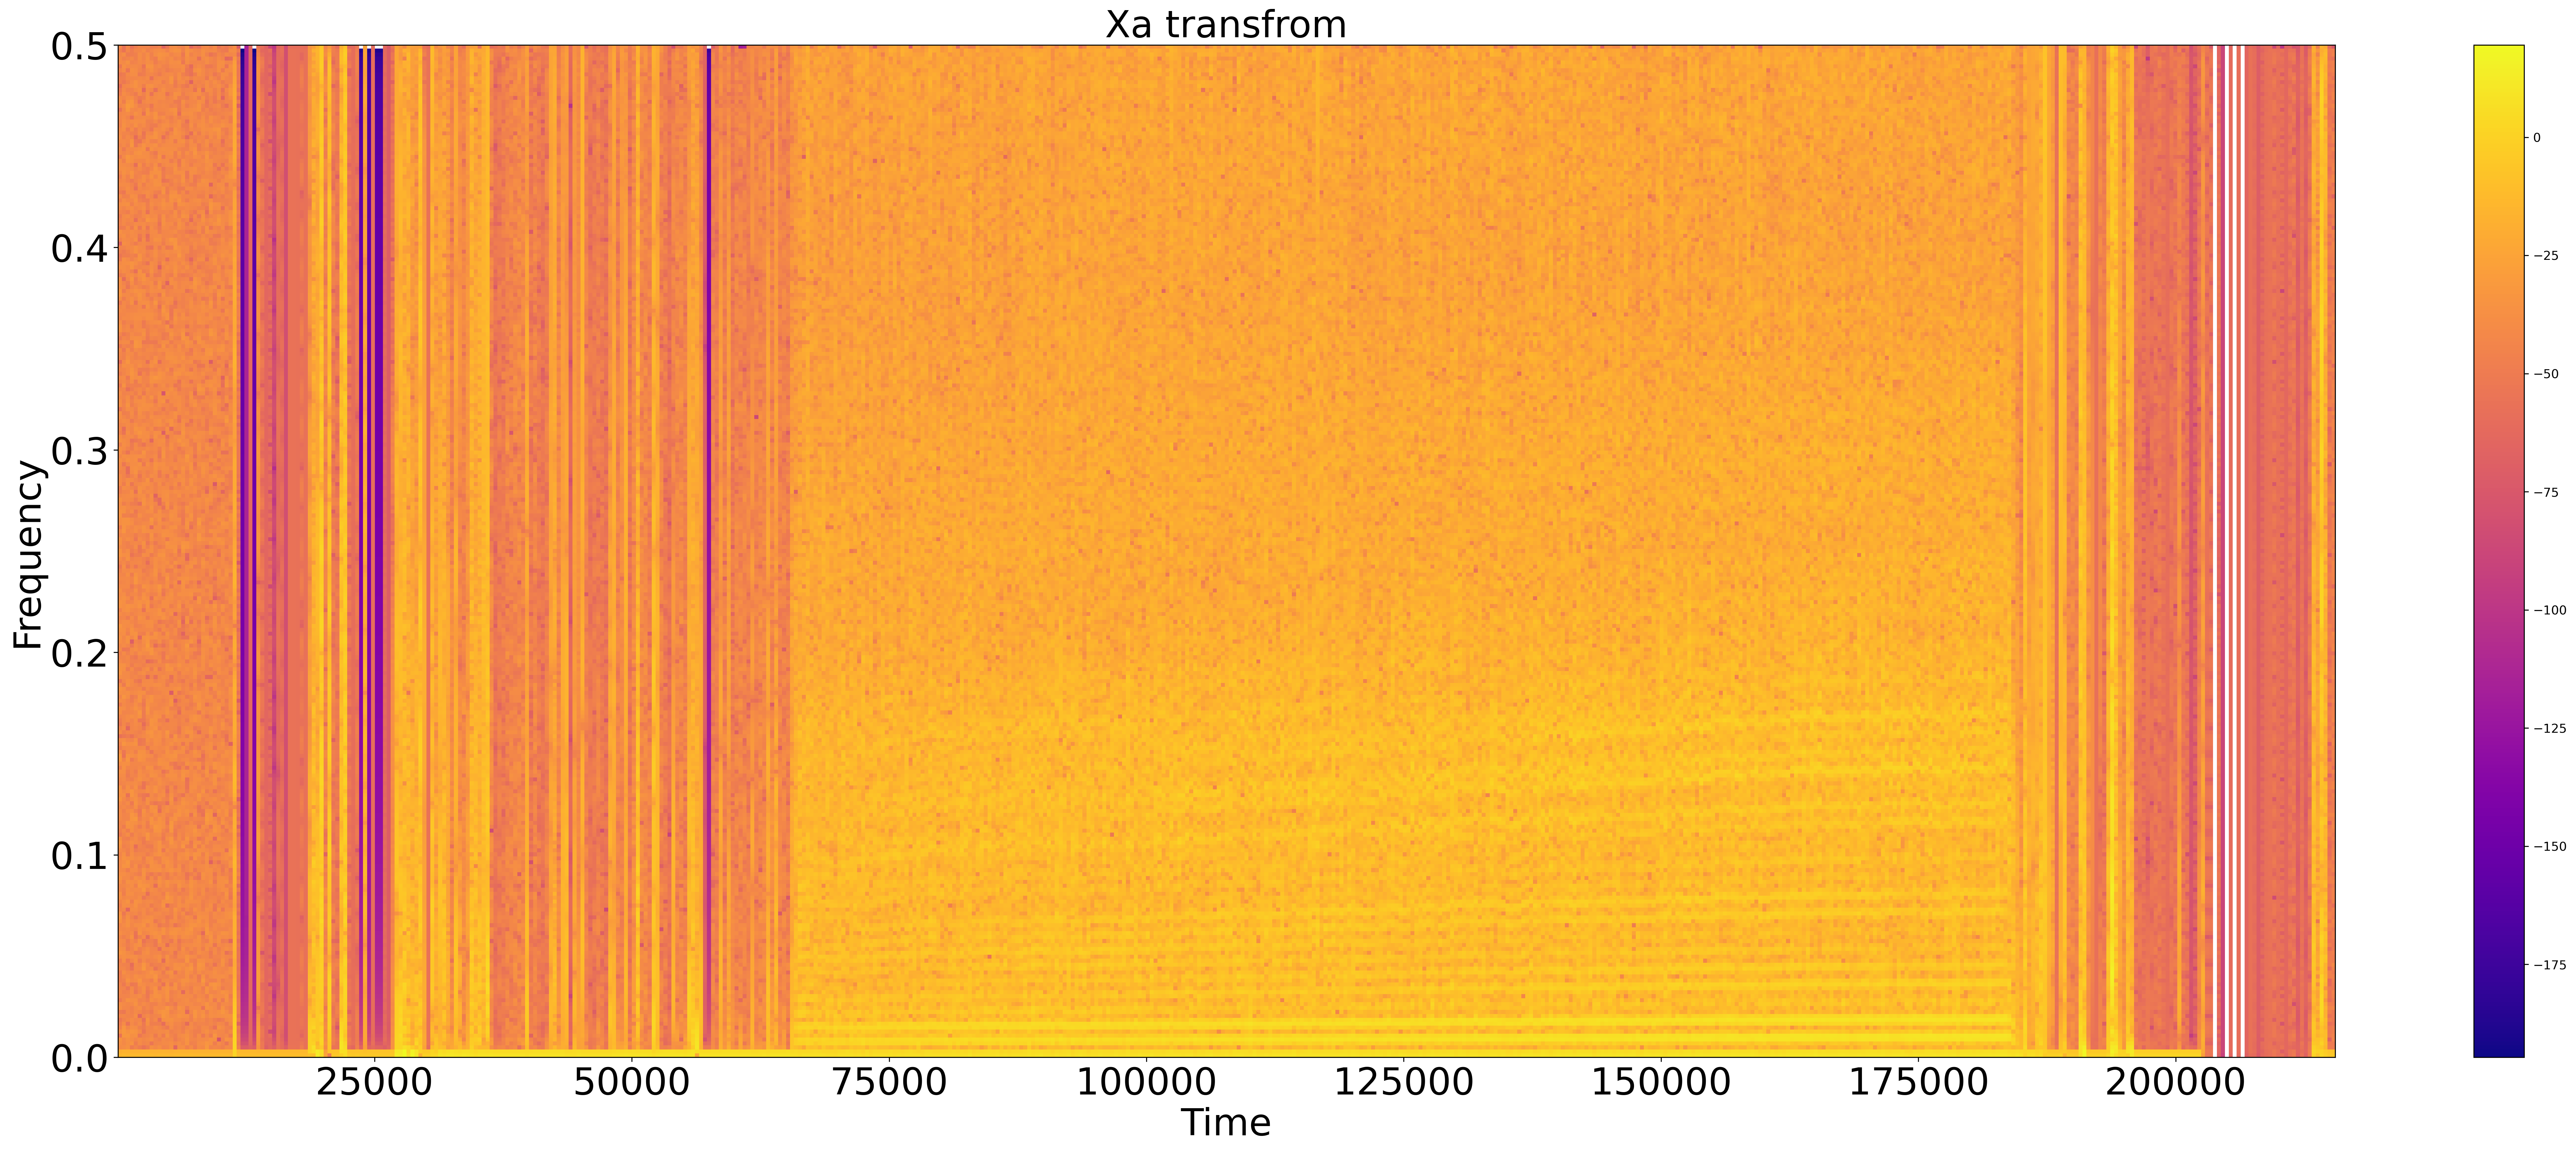

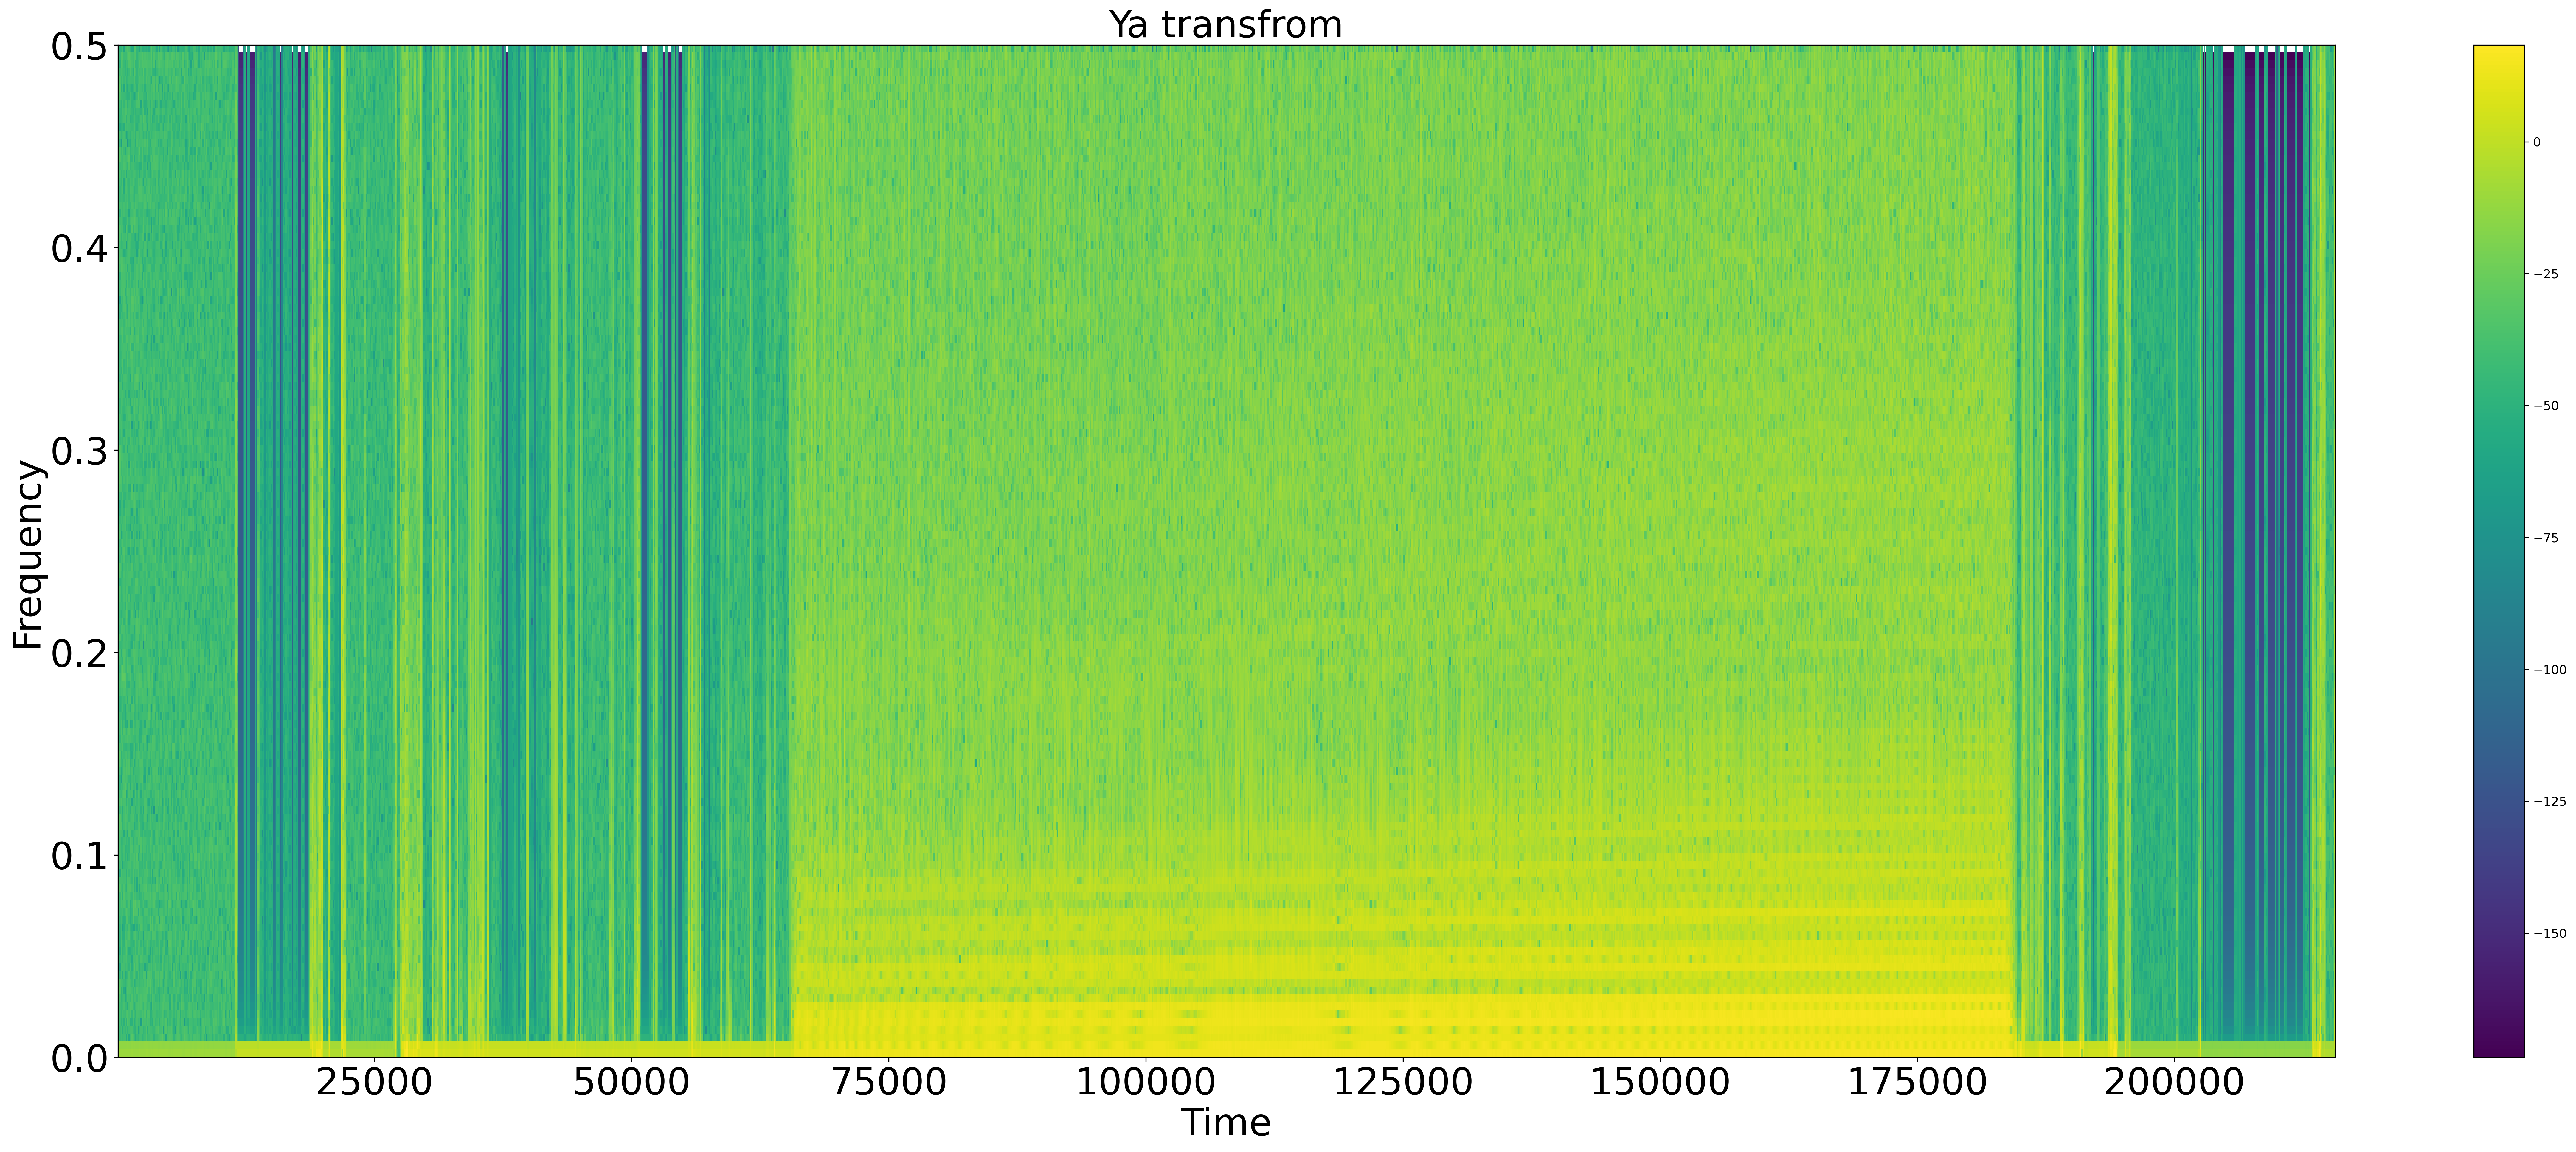

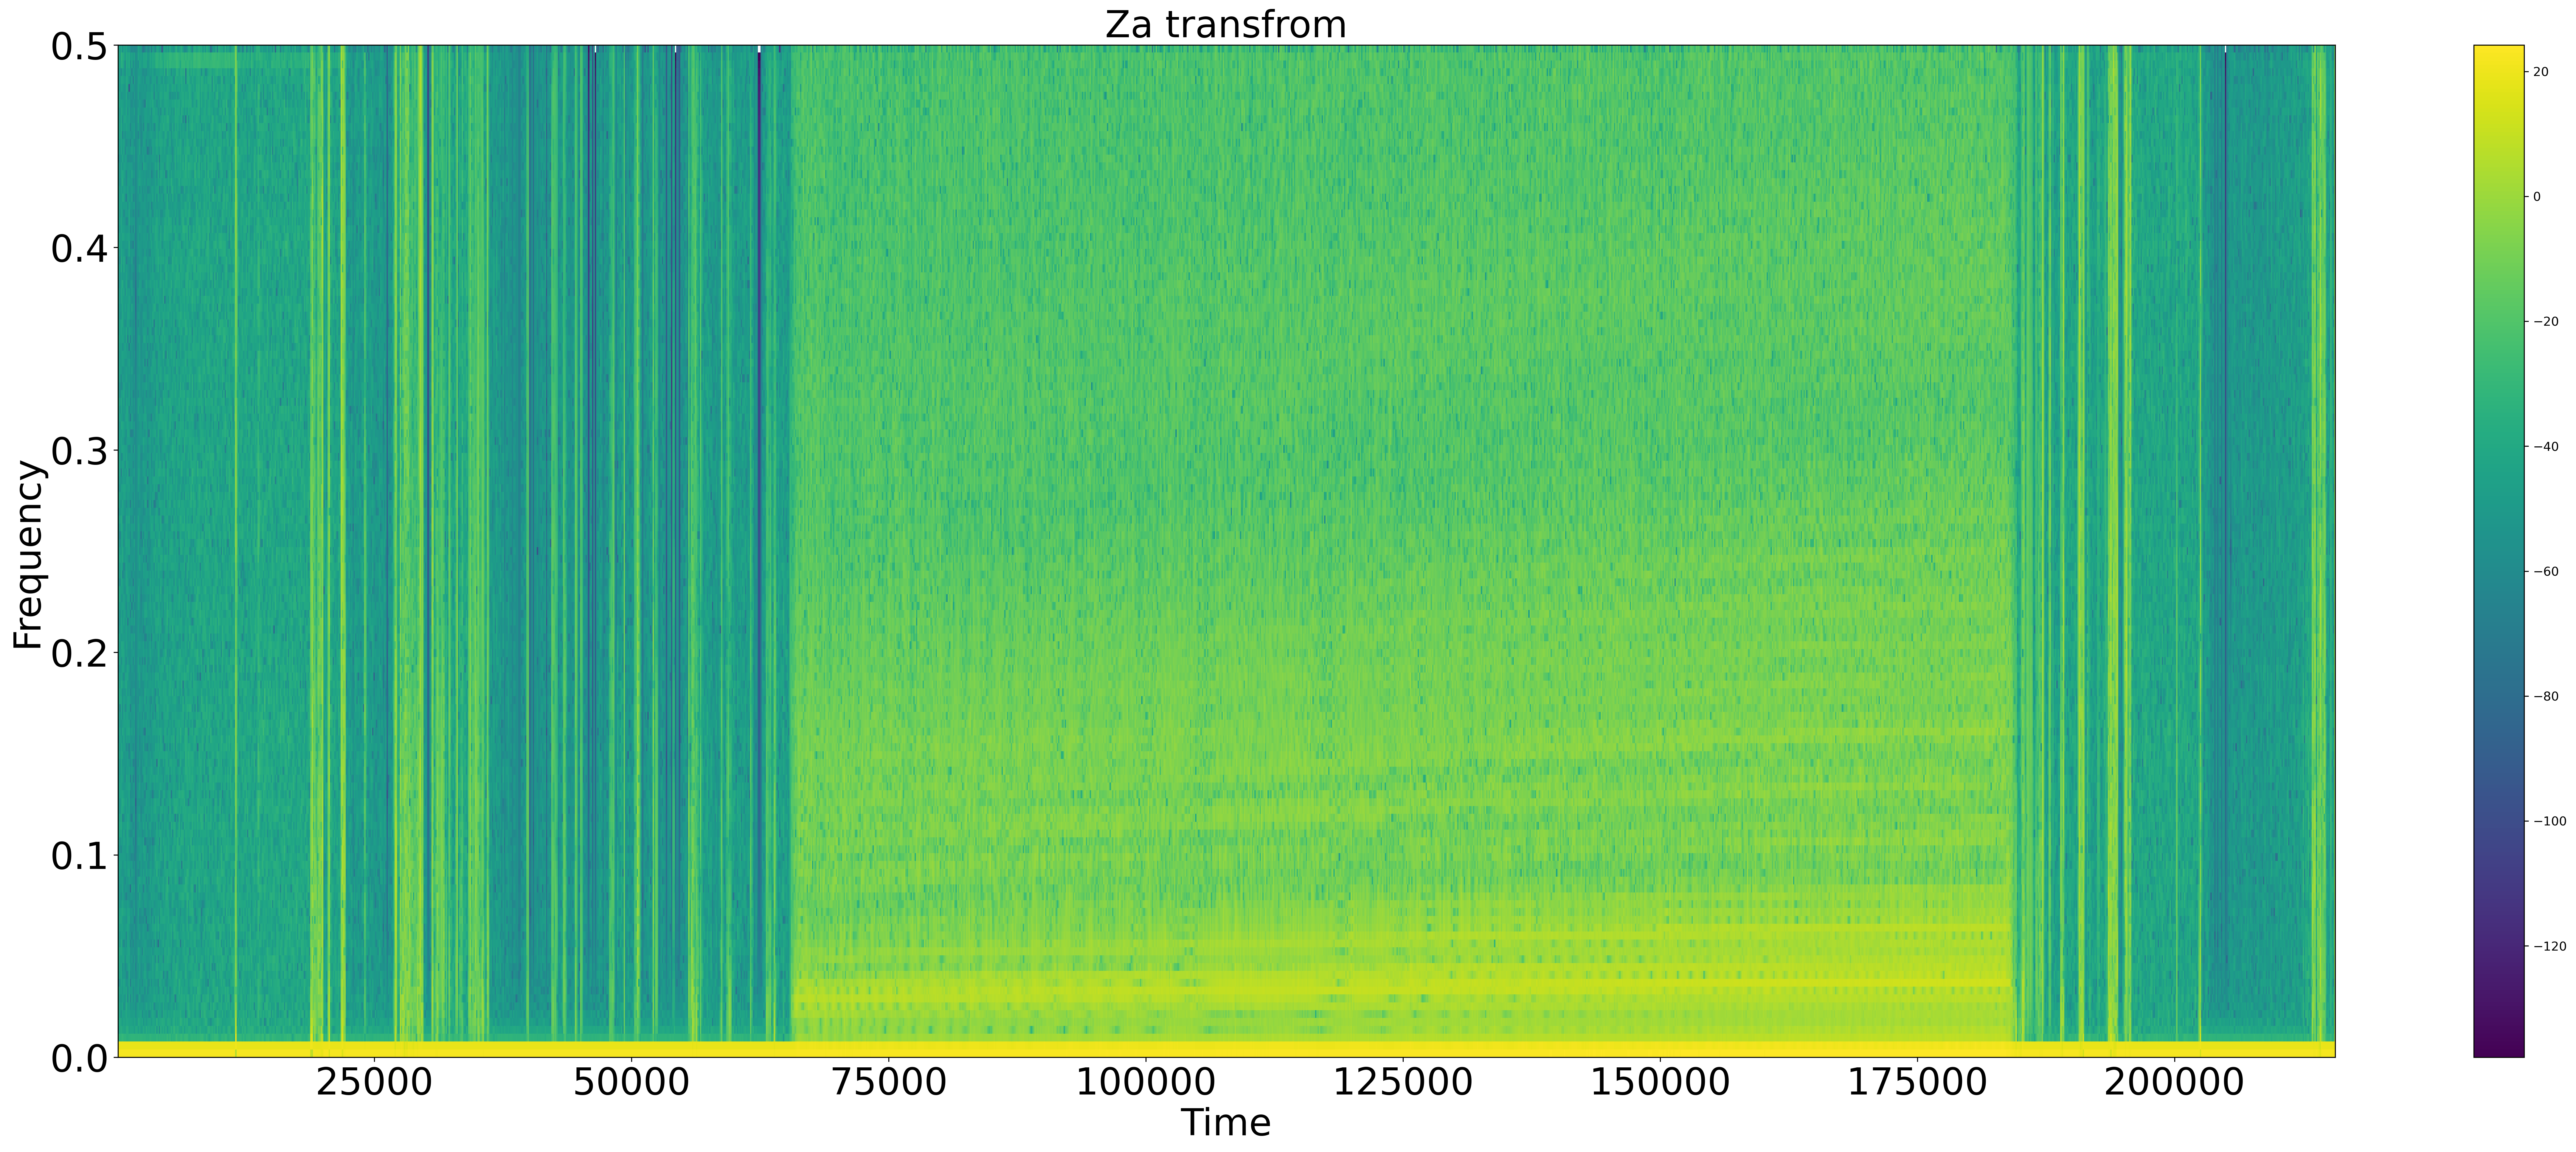

In [5]:
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Xa transfrom',fontsize = 30)  
plt.specgram(data[:,1],Fs=1,NFFT=512,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Ya transfrom',fontsize = 30)  
plt.specgram(data[:,2],Fs=1)
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Za transfrom',fontsize = 30)  
plt.specgram(data[:,3],Fs=1)
plt.colorbar()
plt.show()